In [85]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from keras.callbacks import LearningRateScheduler
from keras.layers import Dropout
from keras.callbacks import Callback
from tensorflow.keras import regularizers
from hyperopt import fmin, tpe, hp
from tensorflow.keras.optimizers import SGD, Adam

In [86]:
# 图片路径
image_folder = "E:\shujuji\metamaterialpicture900features"
# Excel文件路径
excel_path = "E:\\1-1000-90.xlsx"

In [87]:
df = pd.read_excel(excel_path, usecols=[0, 14])  # 使用第1列和第17列的数据，从0开始计数，并跳过第一行

In [88]:
# 初始化图像和性能数组
X = []
y = []

In [89]:
for i in range(1, 651):
    img_path = os.path.join(image_folder, f"lcy{i}.jpg")
    if i in df["编号"].values:
        img = load_img(img_path, target_size=(20, 20))  # 调整为合适的图像大小
        img_array = img_to_array(img)
        img_array = cv2.cvtColor(img_array.astype('uint8'), cv2.COLOR_RGB2GRAY)
        X.append(img_array)
y=df["介电常数"]

In [90]:
# 转换为NumPy数组
X = np.array(X)
y = np.array(y)
print(len(X))
print(len(y))

637
637


In [91]:
# 图片路径
image_folder1 = "E:\metamaterialpicture\metamaterialpicture900features"
# Excel文件路径
excel_path1 = "E:\metamaterialpicture\metamaterialpicture90\\1-430-90.xlsx"
df1 = pd.read_excel(excel_path1, usecols=[0, 14])  # 使用第1列和第17列的数据，从0开始计数，并跳过第一行
# 初始化图像和性能数组
X1 = []
y1 = []
for i in range(1, 431):
    img_path = os.path.join(image_folder1, f"lcy{i}.jpg")
    if i in df1["编号"].values:
        img = load_img(img_path, target_size=(20, 20))  # 调整为合适的图像大小
        img_array = img_to_array(img)
        img_array = cv2.cvtColor(img_array.astype('uint8'), cv2.COLOR_RGB2GRAY)
        X1.append(img_array)

y1=df1["介电常数"]
# 转换为NumPy数组
X1 = np.array(X1)
y1 = np.array(y1)
print(len(X1))
print(len(y1))

404
404


In [92]:
# 图片路径
image_folder2 = "E:\metamaterialpicture\me90features"
# Excel文件路径
excel_path2 = "E:\metamaterialpicture\me90\\1-300-90.xlsx"
df2 = pd.read_excel(excel_path2, usecols=[0, 13])  # 使用第1列和第17列的数据，从0开始计数，并跳过第一行
# 初始化图像和性能数组
X2 = []
y2 = []
for i in range(1, 302):
    img_path = os.path.join(image_folder2, f"lcy{i}.jpg")
    if i in df2["编号"].values:
        img = load_img(img_path, target_size=(20, 20))  # 调整为合适的图像大小
        img_array = img_to_array(img)
        img_array = cv2.cvtColor(img_array.astype('uint8'), cv2.COLOR_RGB2GRAY)
        X2.append(img_array)

y2=df2["介电常数"]
# 转换为NumPy数组
X2 = np.array(X2)
y2 = np.array(y2)
print(len(X2))
print(len(y2))

279
279


In [93]:
X3=np.concatenate((X, X1), axis=0)
y3=np.concatenate((y, y1), axis=0)
X4=np.concatenate((X3, X2), axis=0)
y4=np.concatenate((y3, y2), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train / 255.0
X_test = X_test / 255.0
print(len(X4))
print(len(y4))
print(X_train.shape)

1320
1320
(1056, 20, 20, 1)


In [94]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1), kernel_regularizer=regularizers.l2(0.01)))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())

# 添加隐藏层，并在每个隐藏层上应用L2正则化
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# 输出层
model.add(Dense(1, activation='linear'))


# 编译模型
custom_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mean_squared_error')

In [95]:
# 在 model.fit 中使用 callbacks 参数将 LearningRateScheduler 加入训练过程
history = model.fit(X_train, y_train, epochs=700, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/700
17/17 [==============================] - 1s 14ms/step - loss: 85971.2344 - val_loss: 80374.6797
Epoch 2/700
17/17 [==============================] - 0s 8ms/step - loss: 52623.7930 - val_loss: 17947.4355
Epoch 3/700
17/17 [==============================] - 0s 7ms/step - loss: 20586.1699 - val_loss: 18479.6562
Epoch 4/700
17/17 [==============================] - 0s 8ms/step - loss: 16486.2402 - val_loss: 14466.4561
Epoch 5/700
17/17 [==============================] - 0s 8ms/step - loss: 13631.5156 - val_loss: 12104.5166
Epoch 6/700
17/17 [==============================] - 0s 8ms/step - loss: 10944.0703 - val_loss: 9316.5898
Epoch 7/700
17/17 [==============================] - 0s 8ms/step - loss: 7991.4517 - val_loss: 6196.9307
Epoch 8/700
17/17 [==============================] - 0s 8ms/step - loss: 4854.7935 - val_loss: 3473.9666
Epoch 9/700
17/17 [==============================] - 0s 8ms/step - loss: 2586.8979 - val_loss: 1766.8124
Epoch 10/700
17/17 [=======================

17/17 [==============================] - 0s 8ms/step - loss: 555.4806 - val_loss: 463.8275
Epoch 158/700
17/17 [==============================] - 0s 8ms/step - loss: 553.3110 - val_loss: 480.6765
Epoch 159/700
17/17 [==============================] - 0s 8ms/step - loss: 584.1758 - val_loss: 495.4235
Epoch 160/700
17/17 [==============================] - 0s 7ms/step - loss: 558.6716 - val_loss: 462.2697
Epoch 161/700
17/17 [==============================] - 0s 8ms/step - loss: 574.6412 - val_loss: 483.5555
Epoch 162/700
17/17 [==============================] - 0s 7ms/step - loss: 549.1988 - val_loss: 463.8394
Epoch 163/700
17/17 [==============================] - 0s 8ms/step - loss: 561.3465 - val_loss: 484.8081
Epoch 164/700
17/17 [==============================] - 0s 8ms/step - loss: 644.3976 - val_loss: 459.1786
Epoch 165/700
17/17 [==============================] - 0s 8ms/step - loss: 595.4396 - val_loss: 474.0840
Epoch 166/700
17/17 [==============================] - 0s 7ms/step - 

17/17 [==============================] - 0s 9ms/step - loss: 463.6624 - val_loss: 379.7848
Epoch 314/700
17/17 [==============================] - 0s 9ms/step - loss: 491.1039 - val_loss: 444.3809
Epoch 315/700
17/17 [==============================] - 0s 9ms/step - loss: 480.5793 - val_loss: 389.4679
Epoch 316/700
17/17 [==============================] - 0s 9ms/step - loss: 459.9210 - val_loss: 386.0454
Epoch 317/700
17/17 [==============================] - 0s 9ms/step - loss: 460.8867 - val_loss: 379.9518
Epoch 318/700
17/17 [==============================] - 0s 9ms/step - loss: 461.7278 - val_loss: 377.8906
Epoch 319/700
17/17 [==============================] - 0s 9ms/step - loss: 463.8676 - val_loss: 381.2387
Epoch 320/700
17/17 [==============================] - 0s 8ms/step - loss: 477.7479 - val_loss: 374.2631
Epoch 321/700
17/17 [==============================] - 0s 9ms/step - loss: 456.8814 - val_loss: 479.5733
Epoch 322/700
17/17 [==============================] - 0s 9ms/step - 

17/17 [==============================] - 0s 7ms/step - loss: 397.2339 - val_loss: 378.1903
Epoch 470/700
17/17 [==============================] - 0s 7ms/step - loss: 422.6920 - val_loss: 367.3517
Epoch 471/700
17/17 [==============================] - 0s 8ms/step - loss: 422.8667 - val_loss: 343.4143
Epoch 472/700
17/17 [==============================] - 0s 7ms/step - loss: 401.6797 - val_loss: 334.7303
Epoch 473/700
17/17 [==============================] - 0s 7ms/step - loss: 399.2025 - val_loss: 351.8112
Epoch 474/700
17/17 [==============================] - 0s 7ms/step - loss: 400.6405 - val_loss: 356.0168
Epoch 475/700
17/17 [==============================] - 0s 8ms/step - loss: 404.6704 - val_loss: 337.1851
Epoch 476/700
17/17 [==============================] - 0s 8ms/step - loss: 419.9193 - val_loss: 406.3194
Epoch 477/700
17/17 [==============================] - 0s 8ms/step - loss: 405.6108 - val_loss: 346.5576
Epoch 478/700
17/17 [==============================] - 0s 7ms/step - 

17/17 [==============================] - 0s 7ms/step - loss: 354.7281 - val_loss: 377.8972
Epoch 626/700
17/17 [==============================] - 0s 7ms/step - loss: 364.2497 - val_loss: 393.7074
Epoch 627/700
17/17 [==============================] - 0s 7ms/step - loss: 344.1340 - val_loss: 387.9474
Epoch 628/700
17/17 [==============================] - 0s 8ms/step - loss: 347.3260 - val_loss: 348.6648
Epoch 629/700
17/17 [==============================] - 0s 7ms/step - loss: 350.0767 - val_loss: 395.3082
Epoch 630/700
17/17 [==============================] - 0s 8ms/step - loss: 392.2594 - val_loss: 383.7824
Epoch 631/700
17/17 [==============================] - 0s 7ms/step - loss: 347.6968 - val_loss: 344.8004
Epoch 632/700
17/17 [==============================] - 0s 7ms/step - loss: 347.9150 - val_loss: 345.5330
Epoch 633/700
17/17 [==============================] - 0s 7ms/step - loss: 342.6244 - val_loss: 345.7469
Epoch 634/700
17/17 [==============================] - 0s 7ms/step - 

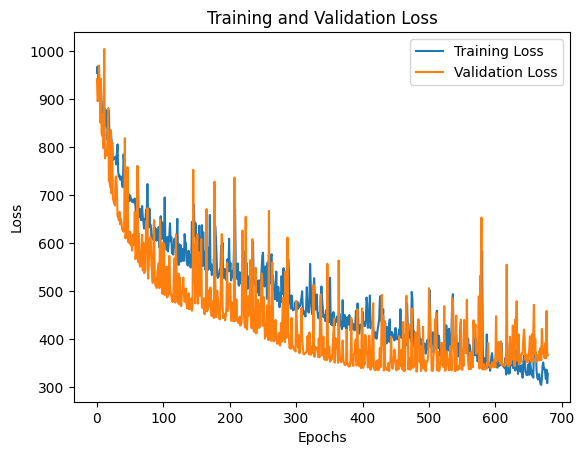

In [96]:
plt.plot(history.history['loss'][20:], label='Training Loss')
plt.plot(history.history['val_loss'][20:], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [97]:
# 在训练集上计算 R² 分数
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# 在验证集上计算 R² 分数
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

# 打印 R² 分数
print(f'R² 分数 - 训练集: {r2_train:.4f}')
print(f'R² 分数 - 验证集: {r2_test:.4f}')

9/9 [==============================] - 0s 2ms/step
R² 分数 - 训练集: 0.9550
R² 分数 - 验证集: 0.9457


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


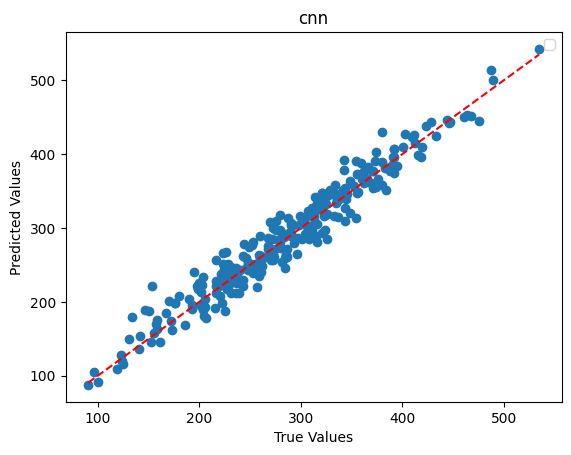

In [98]:
# 绘制真实值和预测值的对比图
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('cnn')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()